# Final Project:
## The influences of pandemic of COVID-19 in United States on stocks of the US stock market

Student: Zheng Fang

DA 210-02 / CS 181-02: Data Systems

Spring 2023

Instructor: Dr. Tanya Amert 

### Part A: Import the packages

In [1]:
import os
import os.path
import json
import sys
import pandas as pd

%load_ext sql

We used above packages to make a our analysis.

### Part B: Connect to our database

In [2]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [3]:
scheme, dbdir, database = getsqlite_creds(source="sqlite_covid")
template = '{}:///{}/{}.db'
cstring = template.format(scheme, dbdir, database)
print("Connection string:", cstring)

Connection string: sqlite:///dbfiles/covid.db


In [4]:
%sql $cstring

We used above code from homework to connect our database `covid`.

### Part C: SQL statements to query a subset of the data from the Database

#### Step 1: Find all stocks and their industry in our database

In [5]:
query = """
SELECT *
FROM company_list
"""

resultset = %sql $query
codedf = resultset.DataFrame()
codedf

 * sqlite:///dbfiles/covid.db
Done.


,Company_Code,Industry
0,NFLX,Communication_Services
1,T,Communication_Services
2,ZM,Communication_Services
3,MAR,Consumer_Discretionary
4,NKE,Consumer_Discretionary
5,QSR,Consumer_Discretionary
6,KO,Consumer_Staples
7,PG,Consumer_Staples
8,UL,Consumer_Staples
9,CVX,Energy


We first extracted all stock codes and their industry sectors using the stock table. We can see that we have a total of 33 different stocks, representing 11 different fields.

In [6]:
codes = codedf["Company_Code"].tolist()
industries = codedf["Industry"].tolist()

We stored this information in two lists: `codes` and `industries`. This information will be used in the later dataframes.

#### Step 2: Find the correlation coefficent between cases number and change of stock price for each stock we have

In [7]:
cases_list = []

for i in range(len(codes)):
    query = """
    SELECT s.Stock_Price AS Open_Price
    FROM covid_case_death as c INNER JOIN stock AS s
        ON c.Date = s.Date
    WHERE Company_Code = '%s' AND Open_Close = 'Open_Price'
    ORDER BY c.Date
    """%codes[i]

    resultset = %sql $query
    open_df = resultset.DataFrame()

    query = """
    SELECT c.New_Cases, s.Stock_Price AS Close_Price
    FROM covid_case_death as c INNER JOIN stock AS s
        ON c.Date = s.Date
    WHERE Company_Code = '%s' AND Open_Close = 'Close_Price'
    ORDER BY c.Date
    """%codes[i]

    resultset = %sql $query
    close_df = resultset.DataFrame()

    resultdf = open_df.join(close_df)
    resultdf["Change"] = resultdf["Open_Price"] - resultdf["Close_Price"]
    resultdf.drop("Open_Price", axis=1, inplace=True)
    resultdf.drop("Close_Price", axis=1, inplace=True)

    cases_list.append([codes[i],industries[i],round(resultdf.corr().iloc[0,1],8)])

 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.d

In order to store the degree of impact of the epidemic on each stock, we have established a list of lists to store this information. In the for loop, I searched the each code one by one and calculated the correlation between stock fluctuations and epidemic fluctuations in each enterprise.

I first merged the `cases` and `stock` tables together through an inner join, and then extracted the case number and the difference between the closing price and the opening price on that day. Save them as two columns of the dataframe. In this way, we can calculate the correlation coefficient between two variables using `.corr()`. Record this information in the list of lists.

In [8]:
cases_list

[['NFLX', 'Communication_Services', 0.08042798],
 ['T', 'Communication_Services', 0.25100497],
 ['ZM', 'Communication_Services', 0.13101915],
 ['MAR', 'Consumer_Discretionary', 0.08548109],
 ['NKE', 'Consumer_Discretionary', 0.15635827],
 ['QSR', 'Consumer_Discretionary', 0.09463399],
 ['KO', 'Consumer_Staples', -0.01412907],
 ['PG', 'Consumer_Staples', -0.16853155],
 ['UL', 'Consumer_Staples', -0.06099742],
 ['CVX', 'Energy', -0.00576852],
 ['SHEL', 'Energy', 0.01750849],
 ['XOM', 'Energy', 0.02784679],
 ['C', 'Financials', -0.01897679],
 ['JPM', 'Financials', 0.01700803],
 ['V', 'Financials', -0.09076076],
 ['BNTX', 'Healthcare', 0.04733198],
 ['JNJ', 'Healthcare', -0.02747486],
 ['MRNA', 'Healthcare', 0.09411169],
 ['CAT', 'Industries', 0.16177817],
 ['UAL', 'Industries', -0.03012056],
 ['UPS', 'Industries', 0.09586955],
 ['AAPL', 'Information_Technology', 0.16779937],
 ['AMZN', 'Information_Technology', 0.1431782],
 ['MSFT', 'Information_Technology', 0.16356483],
 ['BHP', 'Material

In [9]:
cases_df = pd.DataFrame(cases_list, columns = ['Company_Code', 'Industry', 'Correlation coefficient by cases'])
cases_df = cases_df.groupby(["Industry"]).mean()
cases_df

,Correlation coefficient by cases
Industry,
Communication_Services,0.154151
Consumer_Discretionary,0.112158
Consumer_Staples,-0.081219
Energy,0.013196
Financials,-0.030910
Healthcare,0.037990
Industries,0.075842
Information_Technology,0.158181
Materials,0.018144


Finally, I merged the stocks of the same industry in the dataframe through `groupby` and calculated the average of their correlation coefficients.

#### Step 3: Find the correlation coefficent between deaths number and change of stock price for each stock we have

In [10]:
deaths_list = []

for i in range(len(codes)):
    query = """
    SELECT s.Stock_Price AS Open_Price
    FROM covid_case_death as c INNER JOIN stock AS s
        ON c.Date = s.Date
    WHERE Company_Code = '%s' AND Open_Close = 'Open_Price'
    ORDER BY c.Date
    """%codes[i]

    resultset = %sql $query
    open_df = resultset.DataFrame()

    query = """
    SELECT c.New_Deaths, s.Stock_Price AS Close_Price
    FROM covid_case_death as c INNER JOIN stock AS s
        ON c.Date = s.Date
    WHERE Company_Code = '%s' AND Open_Close = 'Close_Price'
    ORDER BY c.Date
    """%codes[i]

    resultset = %sql $query
    close_df = resultset.DataFrame()

    resultdf = open_df.join(close_df)
    resultdf["Change"] = resultdf["Open_Price"] - resultdf["Close_Price"]
    resultdf.drop("Open_Price", axis=1, inplace=True)
    resultdf.drop("Close_Price", axis=1, inplace=True)

    deaths_list.append([codes[i],industries[i],round(resultdf.corr().iloc[0,1],8)])

 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.db
Done.
 * sqlite:///dbfiles/covid.d

In order to store the degree of impact of the epidemic on each stock, we have established a list of lists to store this information. In the for loop, I searched the each code one by one and calculated the correlation between stock fluctuations and epidemic fluctuations in each enterprise.

I first merged the `deaths` and `stock` tables together through an inner join, and then extracted the case number and the difference between the closing price and the opening price on that day. Save them as two columns of the dataframe. In this way, we can calculate the correlation coefficient between two variables using `.corr()`. Record this information in the list of lists.

In [11]:
deaths_list

[['NFLX', 'Communication_Services', 0.02380439],
 ['T', 'Communication_Services', 0.14234208],
 ['ZM', 'Communication_Services', 0.10454189],
 ['MAR', 'Consumer_Discretionary', -0.036617],
 ['NKE', 'Consumer_Discretionary', 0.08482448],
 ['QSR', 'Consumer_Discretionary', 0.0538401],
 ['KO', 'Consumer_Staples', -0.00298949],
 ['PG', 'Consumer_Staples', -0.070483],
 ['UL', 'Consumer_Staples', -0.0520816],
 ['CVX', 'Energy', -0.19867092],
 ['SHEL', 'Energy', -0.10283933],
 ['XOM', 'Energy', -0.06244934],
 ['C', 'Financials', -0.12183893],
 ['JPM', 'Financials', -0.02576994],
 ['V', 'Financials', -0.03758755],
 ['BNTX', 'Healthcare', 0.04064071],
 ['JNJ', 'Healthcare', -0.03684646],
 ['MRNA', 'Healthcare', 0.01451227],
 ['CAT', 'Industries', 0.08826728],
 ['UAL', 'Industries', -0.14492939],
 ['UPS', 'Industries', 0.11590995],
 ['AAPL', 'Information_Technology', 0.06299612],
 ['AMZN', 'Information_Technology', 0.06532331],
 ['MSFT', 'Information_Technology', 0.04802811],
 ['BHP', 'Materials

In [12]:
deaths_df = pd.DataFrame(deaths_list, columns = ['Company_Code', 'Industry', 'Correlation coefficient by deaths'])
deaths_df = deaths_df.groupby(["Industry"]).mean()
deaths_df

,Correlation coefficient by deaths
Industry,
Communication_Services,0.090229
Consumer_Discretionary,0.034016
Consumer_Staples,-0.041851
Energy,-0.121320
Financials,-0.061732
Healthcare,0.006102
Industries,0.019749
Information_Technology,0.058783
Materials,0.049647


Finally, I merged the stocks of the same industry in the dataframe through `groupby` and calculated the average of their correlation coefficients.

#### Step 4: Combine those correlation coefficents in one dataframe

In [13]:
final_df = deaths_df.join(cases_df)
final_df['Final correlation coefficient'] = final_df[['Correlation coefficient by deaths', 'Correlation coefficient by cases']].mean(axis=1)
final_df.drop("Correlation coefficient by deaths", axis=1, inplace=True)
final_df.drop("Correlation coefficient by cases", axis=1, inplace=True)
final_df

,Final correlation coefficient
Industry,
Communication_Services,0.122190
Consumer_Discretionary,0.073087
Consumer_Staples,-0.061535
Energy,-0.054062
Financials,-0.046321
Healthcare,0.022046
Industries,0.047796
Information_Technology,0.108482
Materials,0.033896


For greater rigor, we averaged the correlation coefficients from the death table and the cases table and obtained the final correlation coefficient to indicate the degree to which each industry has been affected by the epidemic.

#### Step 5: draw the graph of the influence of covid on different industry

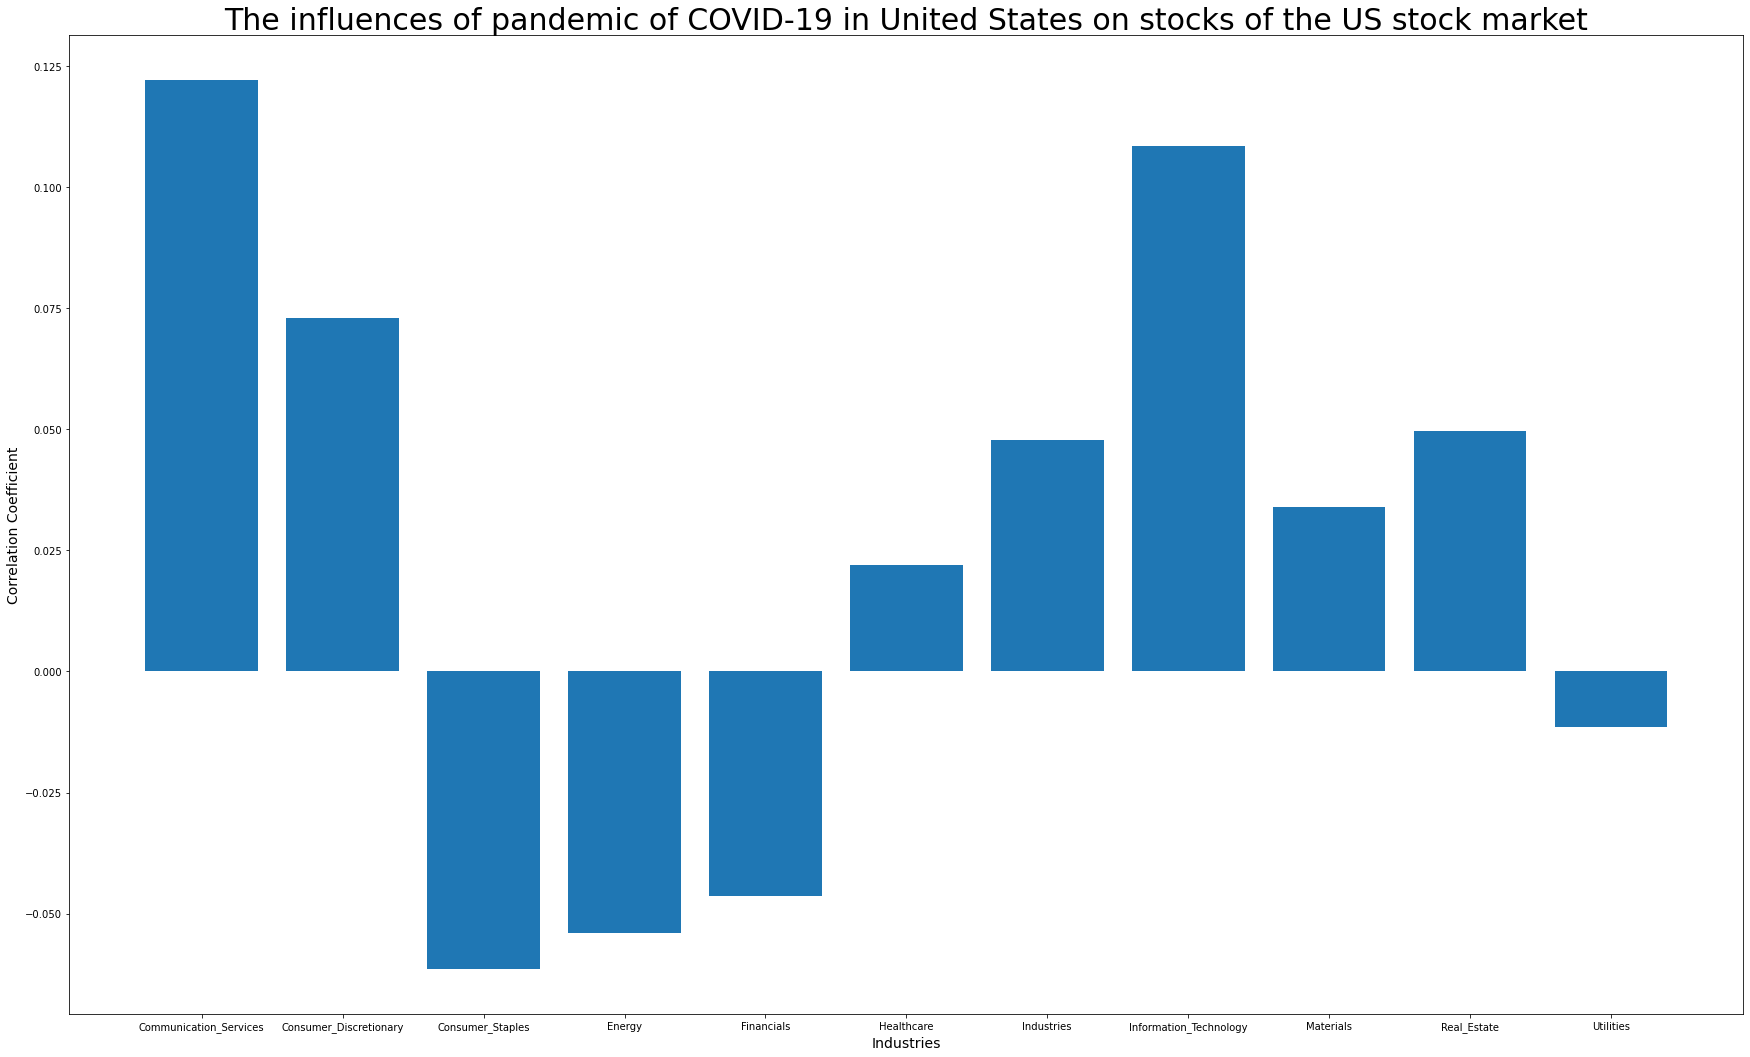

In [14]:
import matplotlib.pyplot as plt

final_df = final_df.reset_index()

fig, ax = plt.subplots(figsize=(30,18))
plt.bar(final_df["Industry"], final_df['Final correlation coefficient'])
plt.xlabel('Industries',fontsize=14)
plt.ylabel('Correlation Coefficient',fontsize=14)
plt.title('The influences of pandemic of COVID-19 in United States on stocks of the US stock market',fontsize=30)
plt.show()

In conclusion, we have found that not all have been hit during the epidemic. Some industries, such as Consumer_ Staples, Energy, and Financials showed a positive correlation with epidemic data during the epidemic. It means that as the number of sick people increases, their stock prices are rising. Other industries have shown varying degrees of impact during the epidemic, and the longer the blue pillars extend downwards, the more sick people are, and the more significant their stock prices decline. Therefore, we can see that this epidemic has had different impacts on various sectors of the US stock market.